<a href="https://colab.research.google.com/github/sagarrokad1/Speech-Emotion-Recognition/blob/main/Notebooks/5_Transfer_learning_on_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
from tqdm import tqdm

import os, glob, sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline

import soundfile as sf
import IPython.display as ipd
from IPython.display import Audio

from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from keras.applications import inception_v3
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import vgg16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling2D, GlobalAveragePooling1D, Dense

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#mounting the google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
audio = "/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/Audio_data/"

In [ ]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [ ]:
folders_main=os.listdir(audio)

#### **Converting all audio files to spectogram images and storing images into drive**

In [ ]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

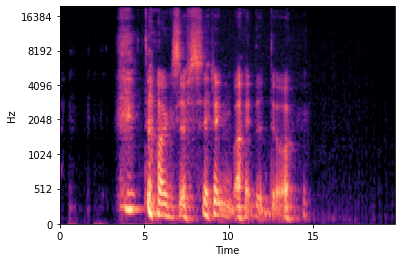

In [ ]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time')

In [ ]:
import re
counter=0
for folders in folders_main :
  path_in='/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/Audio_data/{0}'.format(folders)
  files_sub=os.listdir(path_in)
  for file in files_sub :
    numbers = re.findall('\d+',file)
    emotion=dicts[numbers[2]]
    path_save='/content/drive/MyDrive/AlmaBetter/Capstone Projects/sorted_data/{0}/{1}.png'.format(emotion,file)
    path_load='{0}/{1}'.format(path_in,file)
    y, sr = librosa.load(path_load)
    yt,_=librosa.effects.trim(y)
    y=yt
    y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(y)
    librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time')
    plt.savefig(path_save)

####**Adding Noise to audio files and converting into spectogram images and storing images into drive**

In [ ]:
# FUNCTION TO ADD WHITE NOISE
def noise(y):
    noise_amp = 0.05*np.random.uniform()*np.amax(y)   
    y = y.astype('float64') + noise_amp * np.random.normal(size=y.shape[0])
    return y

In [ ]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

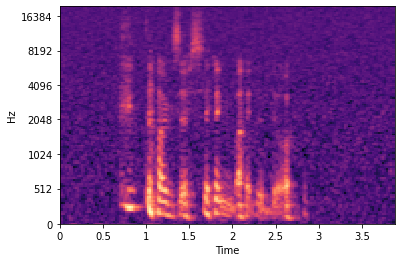

In [ ]:
y = noise(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/Audio_data/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/content/drive/MyDrive/AlmaBetter/Capstone Projects/noise/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y = noise(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

### **Stretch**

In [ ]:
# FUNCTION TO STRETCH THE SOUND
def stretch(y, rate=0.8):
    data = librosa.effects.time_stretch(y, rate)
    return data

In [ ]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)
y=yt

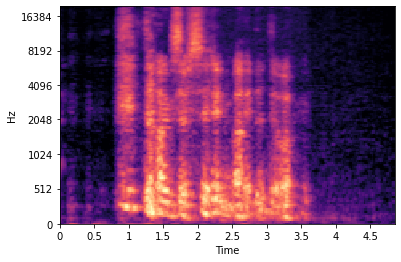

In [ ]:
y= stretch(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/Audio_data/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y= stretch(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

### **Speed N Pitch**

In [ ]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)
y=yt

In [ ]:
# FUNCTION TO INCREASE SPEED AND PITCH 
def speedNpitch(y):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.4  / length_change 
    tmp = np.interp(np.arange(0,len(y),speed_fac),np.arange(0,len(y)),y)
    minlen = min(y.shape[0], tmp.shape[0])
    y *= 0
    y[0:minlen] = tmp[0:minlen]
    return y

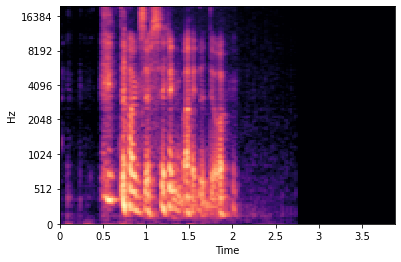

In [ ]:
y= speedNpitch(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/content/drive/MyDrive/AlmaBetter/Capstone Projects/Speech Emotion Recognition - Sagar Rokad/Audio_data/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/content/drive/MyDrive/AlmaBetter/Capstone Projects/speednpitch/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y= speedNpitch(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

### **Attaching labels to Stretch**

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/angry/*.*')
calm = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/calm/*.*')
disgust = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/disgust/*.*')
fearful = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/fearful/*.*')
happy = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/happy/*.*')
neutral = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/neutral/*.*')
sad = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/sad/*.*')
surprised = glob.glob('/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/surprised/*.*')

In [ ]:
data = []
labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Surprised')

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=22, stratify=labels)

In [ ]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'angry': 
            label = 'angry'
        elif labels == 'calm':
            label = 'calm'
        elif labels == 'disgust':
            label = 'disgust'
        elif labels == 'fearful':
            label = 'fearful'
        elif labels == 'happy':
            label = 'happy'
        elif labels == 'neutral':
            label = 'neutral'
        elif labels == 'sad':
            label = 'sad'
        elif labels == 'surprised':
            label = 'surprised'
        
        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory+labels+r'/'+image_file)
            image = cv2.resize(image,(75,75))
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=200)

def get_classlabel(class_code):
    labels = {'angry':'angry', 'calm':'calm', 'disgust':'disgust', 'fearful':'fearful', 'happy':'happy', 'neutral':'neutral','sad':'sad','surprised':'surprised'}
    
    return labels[class_code]

In [ ]:
Images, Labels = get_images('/content/drive/MyDrive/AlmaBetter/Capstone Projects/stretch/')

### **Processing Images for Transfer Learning**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.3,random_state=22, stratify=Labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.3,random_state=22, stratify=Labels)

In [ ]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
X_train.shape

(4025, 224, 224, 3)

In [ ]:
X_test.shape

(1726, 224, 224, 3)

##**Transfer Learning**

### **VGG16 Model**

Text(0.5, 1.0, 'Number of training images per category:')

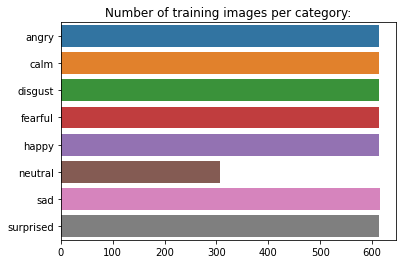

In [ ]:
train_data_dir = "/content/drive/My Drive/AlmaBetter/data/train"
val_data_dir = "/content/drive/My Drive/AlmaBetter/data/validation"
test_data_dir = "/content/drive/My Drive/AlmaBetter/data/test"
category_names = sorted(os.listdir('/content/drive/My Drive/AlmaBetter/data/train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/content/drive/My Drive/AlmaBetter/data/train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

**As from the above plot we can see that we have around 600 images for each emotion(y-label) execpt for 'neutal' one.**

In [ ]:
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape = (img_width, img_height, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in conv_base.layers[:-13]:
    layer.trainable = False

In [ ]:
from tensorflow.python.keras import layers, models, Model, optimizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 4

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)
val_datagen =  ImageDataGenerator(rescale=1./255)

print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = val_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 4605 images belonging to 8 classes.
Total number of images for "validation":
Found 585 images belonging to 8 classes.
Total number of images for "testing":
Found 570 images belonging to 8 classes.


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=False, 
                              validation_data=val_generator,
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
288/288 [==============================] - 2254s 8s/step - loss: 2.0790 - acc: 0.1338 - val_loss: 2.0624 - val_acc: 0.1333
Epoch 2/10
288/288 [==============================] - 80s 277ms/step - loss: 2.0650 - acc: 0.1299 - val_loss: 2.0695 - val_acc: 0.1470
Epoch 3/10
288/288 [==============================] - 80s 277ms/step - loss: 2.0361 - acc: 0.1613 - val_loss: 1.9316 - val_acc: 0.1709
Epoch 4/10
288/288 [==============================] - 80s 278ms/step - loss: 1.9310 - acc: 0.2450 - val_loss: 1.6827 - val_acc: 0.3470
Epoch 5/10
288/288 [==============================] - 80s 278ms/step - loss: 1.6828 - acc: 0.3516 - val_loss: 1.4740 - val_acc: 0.4034
Epoch 6/10
288/288 [==============================] - 80s 278ms/step - loss: 1.5178 - acc: 0.4063 - val_loss: 1.3480 - val_acc: 0.4855
Epoch 7/10
288/288 [==============================] - 80s 278ms/step - loss: 1.3461 - acc: 0.4814 - val_loss: 1.242

####**Model Accuracy & Model Loss**

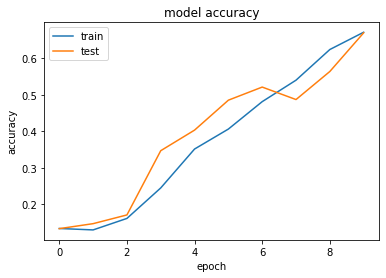

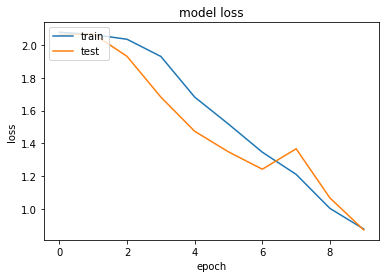

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Though this model is not overfitted but it is highly biased**

## **Inception**

In [ ]:
img_height, img_width = 224,224

imagenet=inception_v3.InceptionV3(weights='imagenet',pooling='avg',include_top=False, input_shape=(img_height, img_width,3))

In [ ]:
for layer in imagenet.layers[:1]:
    layer.trainable=False

In [ ]:
from tensorflow.python.keras import layers, models, Model, optimizers
model = models.Sequential()
model.add(imagenet)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dense_76 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_79 (Dense)             (None, 128)             

In [ ]:
learning_rate = 5e-5
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              )

Epoch 1/10
288/288 [==============================] - 44s 154ms/step - loss: 0.6193 - acc: 0.8421 - val_loss: 1.0160 - val_acc: 0.7248
Epoch 2/10
288/288 [==============================] - 42s 146ms/step - loss: 0.1818 - acc: 0.9472 - val_loss: 1.3900 - val_acc: 0.7094
Epoch 3/10
288/288 [==============================] - 43s 148ms/step - loss: 0.1824 - acc: 0.9494 - val_loss: 1.2624 - val_acc: 0.7248
Epoch 4/10
288/288 [==============================] - 42s 147ms/step - loss: 0.1187 - acc: 0.9672 - val_loss: 1.2081 - val_acc: 0.7316
Epoch 5/10
288/288 [==============================] - 42s 147ms/step - loss: 0.1055 - acc: 0.9672 - val_loss: 0.9748 - val_acc: 0.7795
Epoch 6/10
288/288 [==============================] - 42s 147ms/step - loss: 0.1083 - acc: 0.9683 - val_loss: 0.9189 - val_acc: 0.7778
Epoch 7/10
288/288 [==============================] - 42s 147ms/step - loss: 0.0864 - acc: 0.9763 - val_loss: 1.2408 - val_acc: 0.7316
Epoch 8/10
288/288 [==============================] - 4

####**Model Accuracy & Model Loss**

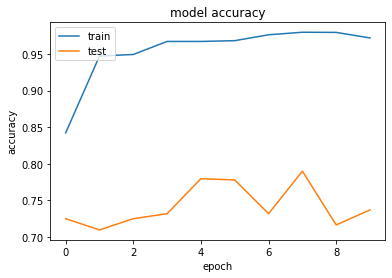

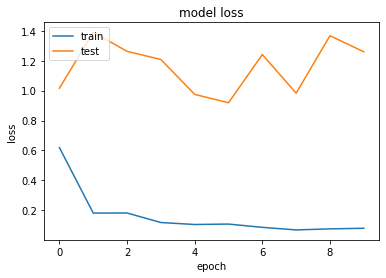

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**This model is also biased and highly overfitted**

# **Conclusion**

**So these are the some of the final conclusions after implementing various technique and models in the given dataset.These are as follows:-**



**1. VGG19 (fine tuning + augmentation) was giving the best accuracy score of 82%  and solved the problems like overfitting to some extent.**

 **2. It's quite difficult to get the accuracy of more than 90% due to lack of data.** 

**3. To solve problems like over-fitting that we had seen in almost every model, we need more real-time data.** 

**4. Noise Adding, Pitching and Shifting for the imbalanced data was helping in achieving a better result.**

**5.Computational cost was much high resulting in several runtime crashes but we’re able to get our best model for deployment.**

# **THANKYOU**